# Pymaceuticals Inc.
---

### Analysis

- 1. From looking at the summary data frame showing the various statistics regarding Tumor Volume (mm3) grouped by the ten drug regimens,  Ramicane and Capomulin have the lowest mean tumor volume (mm3) of all the drug regimens.also ,  from the bar graph that charts number of timepoints by drug regimen, Ramicane and Capomulin were the drugs that had the highest number of timepoint and therefore the largest datasets.  2. Looking at the distribution of data between male and female mice with 49% female, and 51% male, and comparing the distribution between mice of each sex as there is almost an equal distribution of data between the two sexes. This present an apportunity to analyze each drug regimen’s impact on the mice but with a more in-depth look at the mice. 3.  The line plot illustrating Tumor Volume (mm) by Timepoint (Days) for Mouse J119, we can see a  pattern at which Capomulin fights the tumor. We can also observe  two spikes during the line plot which represent two separate six day periods in which there was a relatively low decrease in the size of the tumor volume.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'])]
print("Duplicate Rows except first occurrence based on all columns:")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

In [9]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = len(cleaned_data['Mouse ID'].unique())
print(f"Number of unique mice IDs after cleaning: {unique_mice_count}")

Number of unique mice IDs after cleaning: 249


## Summary Statistics

In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#use group by
drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Tumor Volume Mean":  drug_reg_mean,
                                 "Tumor Volume Median":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(["mean", "median", "var", "std", "sem"])
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

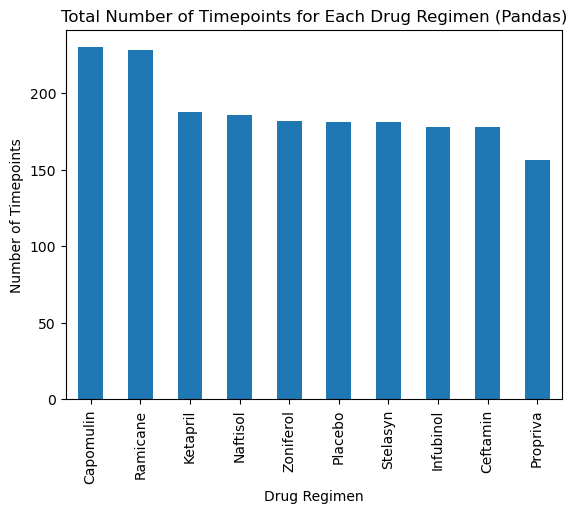

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = cleaned_data['Drug Regimen'].value_counts().plot(kind='bar', title='Total Number of Timepoints for Each Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.show()


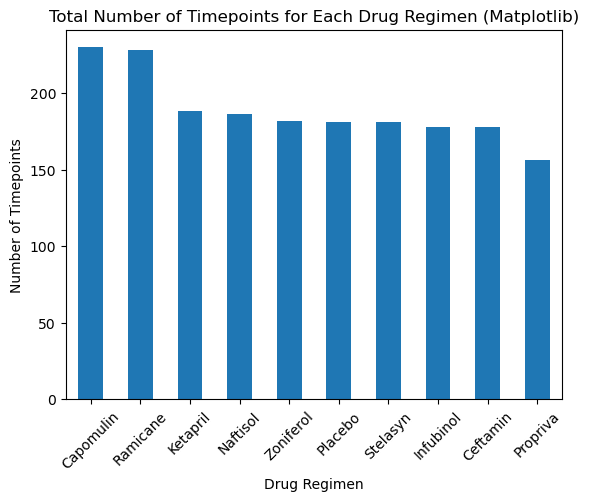

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart_matplotlib = cleaned_data['Drug Regimen'].value_counts().plot(kind='bar', title='Total Number of Timepoints for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45)
plt.show()


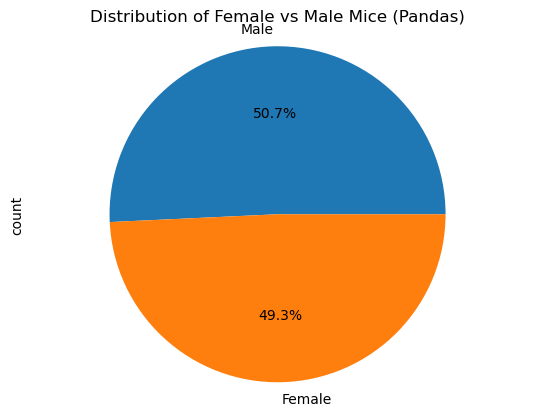

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_pandas = cleaned_data['Sex'].value_counts().plot(kind='pie', title='Distribution of Female vs Male Mice (Pandas)', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

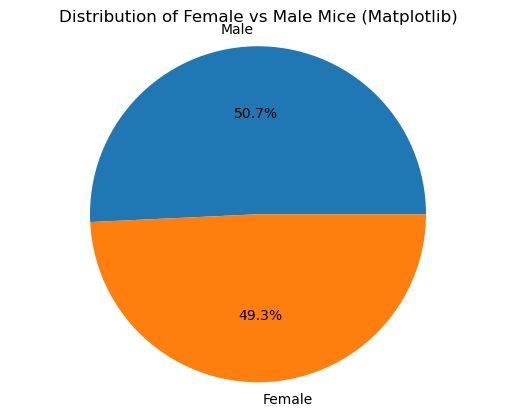

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_matplotlib = plt.pie(cleaned_data['Sex'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
plt.title('Distribution of Female vs Male Mice (Matplotlib)')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") | (cleaned_data["Drug Regimen"] == "Ramicane") |
                                        (cleaned_data["Drug Regimen"] == "Infubinol") |(cleaned_data["Drug Regimen"] == "Ceftamin") ]

# Find  the last (greatest) timepoint for each mouse
last_tp = final_tumor_volumes.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df



,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [106]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment


# Create  list for  tumor vol data  plotting
tumor_volume = []
upperq_list = []
lowerq_list = []


#Calculate quartiles and IQR
for drug in treatment:    
    quartiles = new_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    drug_iqr = upperq-lowerq
    
    #create a list for the upper and lower quartiles 
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)
    print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list


   
    # Determine potential outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# for row in 
#     capomulin_df


iqr for Capomulin: 7.781863460000004
iqr for Ceftamin: 15.577752179999997
iqr for Infubinol: 11.477135160000003
iqr for Ramicane: 9.098536719999998


Text(0.5, 0, '')

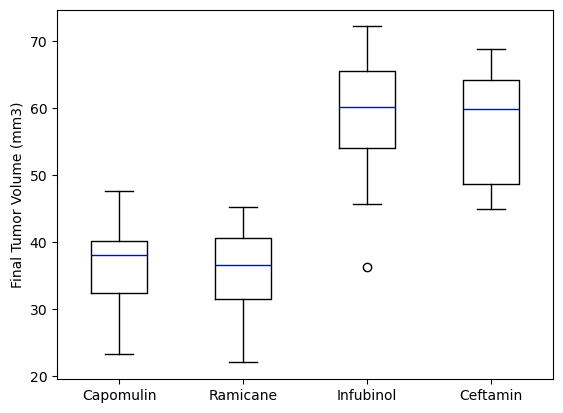

In [56]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

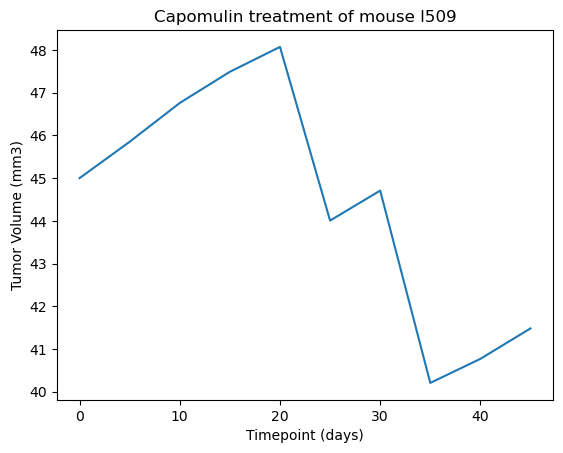

In [122]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#create dataframe with just Capolumin data
capomulin_df = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin") & (cleaned_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

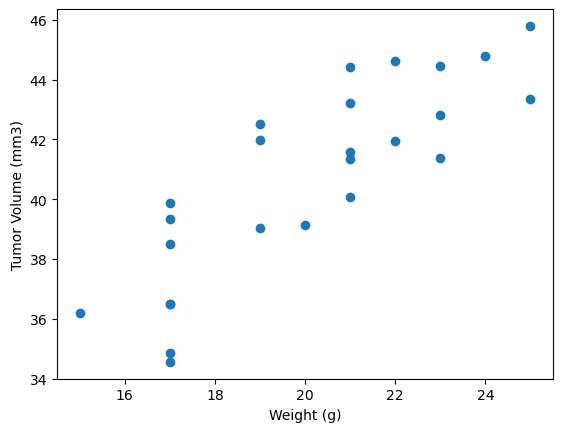

In [129]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = cleaned_data.loc[(cleaned_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_volume = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_volume})
#graph build and display
plt.scatter(weight, avg_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

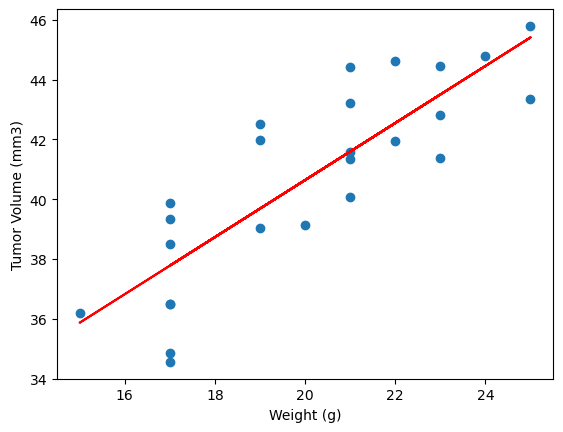

Correlation between mouse weight and average tumor volume for the Capomulin regimen: 0.84


In [131]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr (weight,avg_tumor_vol )

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate correlation and regression


x_values=avg_capomulin_df ["Weight (g)"]
y_values=avg_capomulin_df ["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

print(f"Correlation between mouse weight and average tumor volume for the Capomulin regimen: {round(correlation[0],2)}")